In [2]:
import darksky
from darksky.api import DarkSky, DarkSkyAsync
from darksky.types import languages, units, weather
import pandas as pd
import datetime as dt

In [3]:
API_KEY = '69d876a30f7aa52f97a337392da01caa'
darksky_api = DarkSky(API_KEY)



In [9]:

def query_one(lat, lon, dtnow):

    res = darksky_api.get_time_machine_forecast(
        lat, lon,
        time=dtnow,
        extend='hourly',
        lang=languages.ENGLISH,
#         units=units.AUTO,
        exclude=[weather.MINUTELY, weather.ALERTS]
    )

    return res

In [10]:
dtnow = dt.datetime(2019,3,3,14,30)

In [11]:
lat = 30.132123; lon= 29.1231

In [12]:
res = query_one(lat,lon, dtnow)

In [14]:
res.__dict__

{'latitude': 30.132123,
 'longitude': 29.1231,
 'timezone': 'Africa/Cairo',
 'currently': CurrentlyForecast(2019-03-03 13:30:00+02:00),
 'minutely': MinutelyForecast([0]),
 'hourly': HourlyForecast([24]),
 'daily': DailyForecast([1]),
 'alerts': [],
 'flags': Flags(),
 'offset': 2}

In [15]:
import darksky

In [17]:
def query(ds_datetimes, lat, lon):

    dates = ds_datetimes.apply(lambda x: x.date()).unique()

    data = []

    for datenow in dates:

        dtnow = pd.to_datetime(datenow)

        resnow = query_one(lat, lon, dtnow)

        data += [datanow.__dict__ for datanow in resnow.hourly.data]

    df_weather = pd.DataFrame(data)

    df_weather = df_weather.rename({'time': 'datetime'}, axis=1)

    df_weather['datetime'] = df_weather['datetime'].apply(lambda x: x.replace(tzinfo=None))

    df_weather = df_weather.sort_values('datetime')

    dtnow = dt.datetime.now()

    df_weather['datetimeQuery'] = dtnow

    df_weather['isHistory'] = df_weather['datetime'] < dtnow

    return df_weather


In [18]:
dt1 = dt.datetime(2019,10,3,10,40)
dt2 = dt.datetime(2019,10,4,10,40)
ds = pd.Series([dt1, dt2])

In [19]:
df = query(ds, lat, lon)

In [20]:
df

,datetime,summary,icon,precip_intensity,precip_probability,precip_type,precipAccumulation,temperature,apparent_temperature,dew_point,...,pressure,wind_speed,wind_gust,wind_bearing,cloud_cover,uv_index,visibility,ozone,datetimeQuery,isHistory
0,2019-10-03 00:00:00,Clear,clear-night,0,0,None,None,23.43,23.78,18.66,...,1013.3,3.68,4.63,76,0.00,0,16.093,274.0,2020-06-23 17:32:28.218740,True
1,2019-10-03 01:00:00,Clear,clear-night,0,0,None,None,22.61,22.96,18.56,...,1012.7,3.73,4.57,82,0.02,0,16.093,274.5,2020-06-23 17:32:28.218740,True
2,2019-10-03 02:00:00,Clear,clear-night,0,0,None,None,22.14,22.48,18.40,...,1012.4,3.83,4.58,84,0.05,0,16.093,274.3,2020-06-23 17:32:28.218740,True
3,2019-10-03 03:00:00,Clear,clear-night,0,0,None,None,21.37,21.74,18.45,...,1012.2,3.69,4.63,90,0.07,0,16.093,274.7,2020-06-23 17:32:28.218740,True
4,2019-10-03 04:00:00,Clear,clear-night,0,0,None,None,20.74,21.12,18.31,...,1012.8,3.46,4.77,95,0.14,0,16.093,275.1,2020-06-23 17:32:28.218740,True
5,2019-10-03 05:00:00,Clear,clear-night,0,0,None,None,21.06,21.41,18.21,...,1013.2,3.29,4.94,100,0.07,0,16.093,275.3,2020-06-23 17:32:28.218740,True
6,2019-10-03 06:00:00,Clear,clear-night,0,0,None,None,21.41,21.75,18.22,...,1013.6,3.20,5.23,102,0.05,0,16.093,275.5,2020-06-23 17:32:28.218740,True
7,2019-10-03 07:00:00,Clear,clear-day,0,0,None,None,22.59,22.96,18.71,...,1013.5,3.17,5.55,109,0.00,0,16.093,275.4,2020-06-23 17:32:28.218740,True
8,2019-10-03 08:00:00,Clear,clear-day,0,0,None,None,24.66,24.99,18.64,...,1013.8,3.29,5.73,119,0.00,2,16.093,274.2,2020-06-23 17:32:28.218740,True
9,2019-10-03 09:00:00,Clear,clear-day,0,0,None,None,27.42,28.37,18.16,...,1014.0,3.51,5.38,131,0.00,4,16.093,273.6,2020-06-23 17:32:28.218740,True


In [21]:
df = pd.read_csv('GrowLocations.csv')

In [25]:
df

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime
0,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
1,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
2,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
3,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
4,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
...,...,...,...,...,...,...,...,...
39289,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z
39290,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z
39291,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z
39292,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z


In [26]:
df.BeginTime.sort_values()

22843    0001-01-01T00:00:00.000Z
22844    0001-01-01T00:00:00.000Z
22842    0001-01-01T00:00:00.000Z
22845    0001-01-01T00:00:00.000Z
22846    0001-01-01T00:00:00.000Z
                   ...           
39267    2019-10-30T12:50:22.000Z
39266    2019-10-30T12:50:22.000Z
39265    2019-10-30T12:50:22.000Z
39264    2019-10-30T12:50:22.000Z
39269    2019-10-30T12:50:22.000Z
Name: BeginTime, Length: 39294, dtype: object

In [33]:
df = df[~df.BeginTime.str.contains('00:00:00')]

In [34]:
df['Begin'] = pd.to_datetime(df['BeginTime'])

<ipython-input-34-0bbbaf46c8d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Begin'] = pd.to_datetime(df['BeginTime'])


In [35]:
df['End'] = pd.to_datetime(df['EndTime'])

<ipython-input-35-d4847c1b142a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['End'] = pd.to_datetime(df['EndTime'])


In [40]:
asd = (df['End'] - df['Begin']).apply(lambda x: x.seconds)

In [41]:
import matplotlib.pyplot as plt 

In [42]:
%matplotlib inline

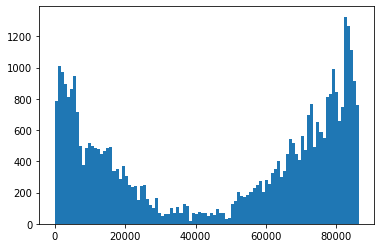

In [43]:
plt.hist(asd, bins=100);

In [45]:
80000 / 60 / 60

22.22222222222222

In [46]:
df.shape

(39288, 10)

In [47]:
df

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime,Begin,End
0,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,2018-10-17 13:14:07+00:00,2018-10-17 13:59:07+00:00
1,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,2018-10-17 13:14:07+00:00,2018-10-17 13:59:07+00:00
2,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,2018-10-17 13:14:07+00:00,2018-10-17 13:59:07+00:00
3,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,2018-10-17 13:14:07+00:00,2018-10-17 13:59:07+00:00
4,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,2018-10-17 13:14:07+00:00,2018-10-17 13:59:07+00:00
...,...,...,...,...,...,...,...,...,...,...
39289,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z,2019-10-19 14:48:29+00:00,2019-10-30 15:33:29+00:00
39290,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z,2019-10-19 14:48:29+00:00,2019-10-30 15:33:29+00:00
39291,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z,2019-10-19 14:48:29+00:00,2019-10-30 15:33:29+00:00
39292,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z,2019-10-19 14:48:29+00:00,2019-10-30 15:33:29+00:00
